# Flipkart Sales Data Analysis

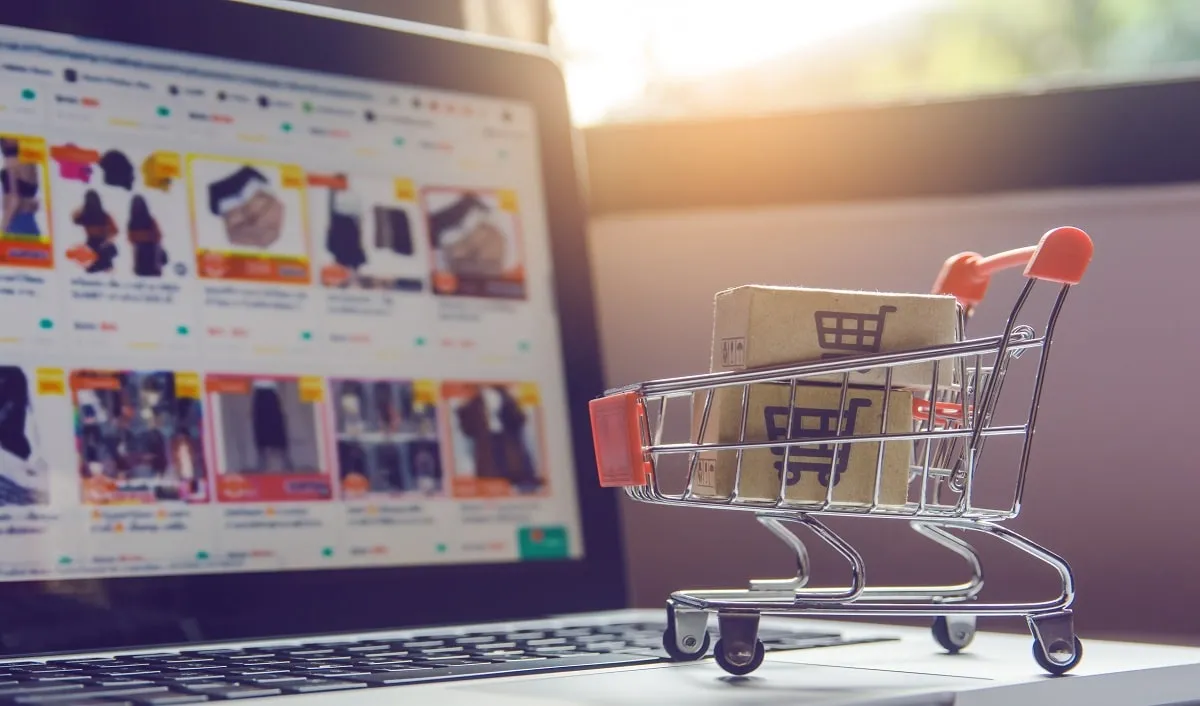

<br>
<br>

## Problem Statement

Flipkart is a leading e-commerce platform in India that offers a wide range of products to its customers. The dataset contains detailed information about transactions made on Flipkart, including product details, sales data, and other relevant metrics. The objective of this project is to analyze the sales data to extract valuable insights that can drive business strategies and improve profitability.

The analysis will focus on answering the following key business questions:

- `Total Revenue Generation`: What is the total revenue generated by Flipkart, and how has it changed over time?
- `Revenue Trends`: Find the trend of revenue over time and identify patterns or seasonality.
- `Monthly Order Analysis`: How many orders were placed on Flipkart, and how does this vary by month?
- `Sales by Day of the Week`: Identify any particular days of the week that have unusually high or low sales.
- `City Contribution`: What is the contribution of each city to the overall revenue? Which city generates the most revenue?
- `Average Sale Value`: What is the average sale value per transaction?
- `Top Revenue-Generating Products`: Which products generate the highest revenue across all cities? What are the top 10 products by revenue?
- `City-Specific Products`: Are there any products that sell particularly well in specific cities?
- `Monthly Performance of Top Products`: How does the performance of top products vary month-to-month?
- `Customer Loyalty Analysis`: What percentage of revenue is generated from repeat customers versus new customers? Is there a trend in customer loyalty over the months?

----

## Data Dictionary

### 1. Products.csv

- **product_id**: A unique identifier assigned to each product.
- **product_name**: The name or title of the product.
- **unit**: The measurement or quantity in which the product is sold (e.g., piece, kilogram).
- **product_type**: The specific classification or category of the product (e.g., electronics, apparel).
- **brand_name**: The name of the brand under which the product is sold.
- **manufacturer_name**: The name of the company or entity that manufactures the product.
- **l0_category**: The top-level category that broadly classifies the product.
- **l1_category**: A sub-category under the top-level category for more specific classification.
- **l2_category**: A further refined sub-category under the l1_category.
- **l0_category_id**: A unique identifier for the l0_category.
- **l1_category_id**: A unique identifier for the l1_category.
- **l2_category_id**: A unique identifier for the l2_category.


### 2. Sales.csv

- **date**: The specific date when the order or transaction occurred.
- **city_name**: The name of the city where the order was placed or delivered.
- **order_id**: A unique identifier for each order placed.
- **cart_id**: A unique identifier for each shopping cart instance, which may contain multiple products.
- **dim_customer_key**: A unique identifier for the customer placing the order.
- **procured_quantity**: The number of units of the product procured or ordered.
- **unit_selling_price**: The price at which a single unit of the product is sold.
- **total_discount_amount**: The total discount applied to the order.
- **product_id**: A unique identifier assigned to each product (repeated for context).
- **total_weighted_landing_price**: The total cost of a product on its journey from the factory floor to your buyer's door. 

---

## Data Loading

### Import necessary libraries for analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load all the datasets 

In [2]:
product_df = pd.read_csv('products.csv')
sales_df = pd.read_csv('Sales.csv')

#### 1. Product_df

In [3]:
# preview of the products data
product_df.head()

,Unnamed: 0,product_id,product_name,unit,product_type,brand_name,manufacturer_name,l0_category,l1_category,l2_category,l0_category_id,l1_category_id,l2_category_id
0,0,476763,Christmas - Card,1 unit,Card,NaN,HOT,Specials,Bill Breaker,Bill Breaker,343,1741,1741
1,1,483436,Plum BodyLovin' Hawaiian Rumba Shower Gel - Sa...,20 ml,Sample,Plum BodyLovin',Pureplay Skin Sciences India Pvt. Ltd.,Specials,Free Store,Free Store,343,1493,1493
2,2,476825,Diwali Gift Card Free - Sample,1 unit,Sample,NaN,HOT,Specials,Bill Breaker,Bill Breaker,343,1741,1741
3,3,483438,Plum BodyLovin' Trippin' Mimosas Shower Gel - ...,20 ml,Sample,Plum BodyLovin',Pureplay Skin Sciences India Pvt. Ltd.,Specials,Free Store,Free Store,343,1493,1493
4,4,480473,Flipkart Valentine Day Greeting - Card,1 unit,Card,Flipkart,Dummy Manufacturer,Specials,Bill Breaker,Bill Breaker,343,1741,1741


In [4]:
# dropping the un-necessary feature
product_df.drop(['Unnamed: 0', 'unit','manufacturer_name' ,'l0_category_id', 'l1_category_id', 'l2_category_id'], axis=1, inplace=True)

#### 2. Sales_df

In [5]:
sales_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date_,city_name,order_id,cart_id,dim_customer_key,procured_quantity,unit_selling_price,total_discount_amount,product_id,total_weighted_landing_price
0,0,0,0,2022-04-01,Mumbai,112246974,173273802,17995199,1,234.0,0.0,344107,202.513030
1,1,1,1,2022-04-01,Bengaluru,112246976,173273597,18259433,1,64.0,0.0,389676,48.714375
2,2,2,2,2022-04-01,Bengaluru,112247019,173123717,5402601,1,1031.0,0.0,39411,975.996000
3,3,3,3,2022-04-01,HR-NCR,112247045,172547459,15649744,1,57.0,0.0,369742,25.000000
4,4,4,4,2022-04-01,Mumbai,112247123,173081820,10127605,2,30.0,0.0,12872,57.980004


In [6]:
# dropping the un-necessary features
sales_df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

### Merging both the datasets

In [7]:
df = pd.merge(product_df, sales_df, on='product_id')

---

## Data Cleaning

### Checking For Missing Values

In [8]:
df.isnull().sum()

product_id                             0
product_name                           0
product_type                           0
brand_name                      11949623
l0_category                            0
l1_category                            0
l2_category                            0
date_                                  0
city_name                              0
order_id                               0
cart_id                                0
dim_customer_key                       0
procured_quantity                      0
unit_selling_price                     0
total_discount_amount                  0
total_weighted_landing_price       77222
dtype: int64

### Handling Missing Values

In [9]:
# Replacing NaN values of total weighted landing price column
df.sort_values(['date_', 'product_id', 'procured_quantity', 'city_name'], inplace=True)
df['total_weighted_landing_price'] = df['total_weighted_landing_price'].ffill()

#### Handling Missing Values of brand_name feature

- As most of the nan values are either vegetables or fruits, hence fill this missing values with appropriate values.

In [10]:
df['brand_name'] = df['brand_name'].fillna(df['l2_category'])

### Converting Features to Appropriate Data Types

In [11]:
df['date_'] = pd.to_datetime(df['date_'])

# Converting to int
df['unit_selling_price'] = df['unit_selling_price'].astype('int')
df['total_discount_amount'] = df['total_discount_amount'].astype('int')

# rounding to 2 decimal places
df['total_weighted_landing_price'] = df['total_weighted_landing_price'].round(2)

### Drop the unnecessary datapoints

In [12]:
# removing datapoints with procured quantity = 0
df = df[df['procured_quantity'] != 0]

In [13]:
# removing datapoints with unit selling price & total weighted landing price = 0
df = df[(df['unit_selling_price'] != 0) & (df['total_weighted_landing_price'] >= 0)] 

#### Note:

- In the sales data from Flipkart, some products are offered with discounts ranging from 99% to 100%. This indicates that these products are either heavily discounted to clear inventory or part of special promotional campaigns.


---

## Feature Engineering

#### The revenue from sales after deducting any discounts, returns, or allowances. It represents the actual income generated from sales activities.

In [14]:
df['revenue'] = (df['unit_selling_price']*df['procured_quantity']) - df['total_discount_amount']

#### profit a company makes after deducting the costs associated with making and selling its products, or the costs associated with providing its services. It does not account for other expenses such as administrative, selling, and other overhead costs.

In [15]:
# Calculate profit and loss
df['profit'] = (df['revenue'] - df['total_weighted_landing_price']).clip(lower=0)
df['loss'] = (df['total_weighted_landing_price'] - df['revenue']).clip(lower=0)

---

# 1. Sales and Revenue Analysis

## 1.1. What is the total revenue generated by Flipkart?

In [16]:
total_revenue = df['revenue'].sum()
total_revenue_crores = total_revenue/10000000

print('The total revenue generated by Flipkart:', total_revenue_crores, 'Crores')

The total revenue generated by Flipkart: 463.9169967 Crores


## 1.2. Find the trend of revenue over time?

In [17]:
# Group by the month extracted from the 'date_' column, and calculate revenue
monthly_sales_revenue = df.groupby(df['date_'].dt.to_period('M'))['revenue'].sum().reset_index()

# Rename the columns 
monthly_sales_revenue.columns = ['Month', 'Total_Revenue']
print(monthly_sales_revenue)

     Month  Total_Revenue
0  2022-04     1519138337
1  2022-05     1183908732
2  2022-06     1217291874
3  2022-07      718831024


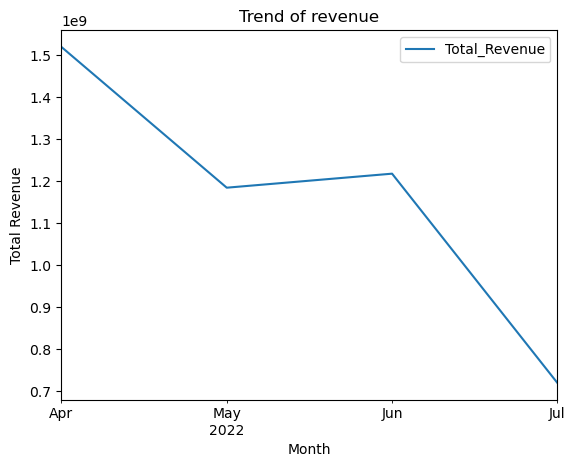

In [18]:
monthly_sales_revenue.plot(x='Month')

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title("Trend of revenue")

plt.grid(False)
plt.show()

#### Observation:

- In April 2022, total revenue was the highest at 151.91 crores
- In May 2022, there was a noticeable drop in revenue, falling to 118.39 crores.
- In June 2022, revenue slightly increased to 121.73 crores.
- By July 2022, there was a significant drop in revenue to 71.88 crores which was the lowest for the four-month period.

Overall, the total revenue showed a declining trend over these months, with the largest drop between June and July.

## 1.3. How many orders were placed on Flipkart, and how does this vary by month?

In [19]:
# The total number of orders placed on Flipkart
total_orders = df['order_id'].nunique()
total_orders_crores = total_orders/10000000

print('The total number of orders placed on Flipkart is', total_orders_crores, 'Crore')

The total number of orders placed on Flipkart is 1.0391338 Crore


In [20]:
# Find the trend of orders placed monthly
monthly_orders = df.groupby(df['date_'].dt.to_period('M'))['order_id'].nunique().reset_index()

# Rename the columns 
monthly_orders.columns = ['Month', 'Total_Orders']
print(monthly_orders)

     Month  Total_Orders
0  2022-04       3423645
1  2022-05       2828950
2  2022-06       2710986
3  2022-07       1427757


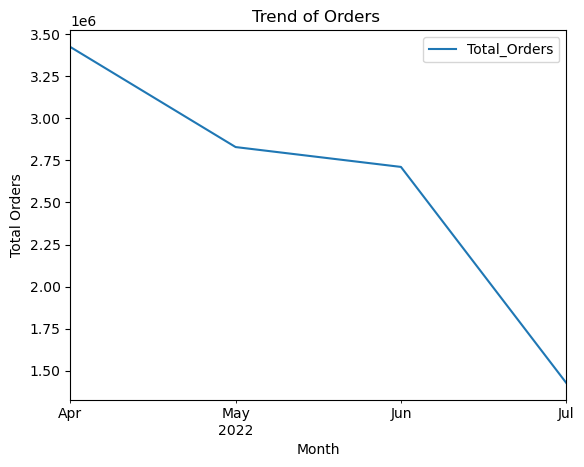

In [21]:
monthly_orders.plot(x='Month')

plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title("Trend of Orders ")

plt.grid(False)
plt.show()

#### Observations

- In April 2022, the total number of orders was the highest at 34,23,645.
- In May 2022, the total orders decreased to 28,28,950.
- In June 2022, the total orders continued to decline slightly to 27,10,986.
- By July 2022, the number of orders dropped significantly to 14,27,757, which was the lowest for the period.

Overall, there is a clear downward trend in the number of total orders over these four months, with the sharpest decrease occurring between June and July.

## 1.4. Identify any particular days of the week that have unusually high or low sales?

  Day_of_Week  Total_Sales
0      Monday    579557645
1     Tuesday    538311447
2   Wednesday    598060421
3    Thursday    600386035
4      Friday    719937453
5    Saturday    793376760
6      Sunday    809540206


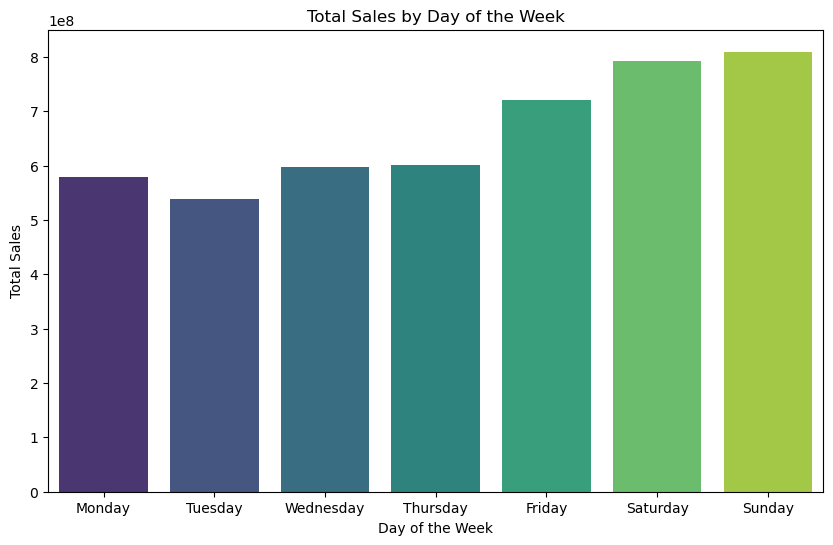

In [22]:
# Create a 'day_of_week' column
df['day_of_week'] = df['date_'].dt.day_name()

# Group by day of the week to calculate average sales for each day
day_of_week_sales = df.groupby('day_of_week')['revenue'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Rename columns 
day_of_week_sales.columns = ['Day_of_Week', 'Total_Sales']
print(day_of_week_sales)

# Plot sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=day_of_week_sales, x='Day_of_Week', y='Total_Sales', palette='viridis')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')

plt.show()


#### Observations

- Sunday recorded the highest total sales, reaching 80.95 Crore, making it the peak sales day.
- Saturday followed closely with total sales of 79.34 Crore, also contributing significantly to the overall revenue.
- Friday had strong sales with a total of 71.99 Crore Rupees, rounding out the top three sales days.
- During weekdays, the sales figures were noticeably lower:
    - Thursday had sales of 60.03 Crore.
    - Wednesday recorded 59.81 Crore.
    - Monday saw total sales of 57.96 Crores.
    - Tuesday had the lowest sales at 53.83 Crores.

In summary, sales are considerably higher on weekends (Saturday and Sunday) compared to weekdays, with Sunday being the highest sales day, and Tuesday experiencing the lowest sales.

## 1.5. What is the contribution of each city to the overall revenue? Which city generates the most revenue?

In [23]:
# Revenue Contribution

# Group by city to calculate total revenue for each city
city_revenue = df.groupby('city_name')['revenue'].sum().reset_index()

# Rename columns for clarity
city_revenue.columns = ['City', 'Total_Revenue']

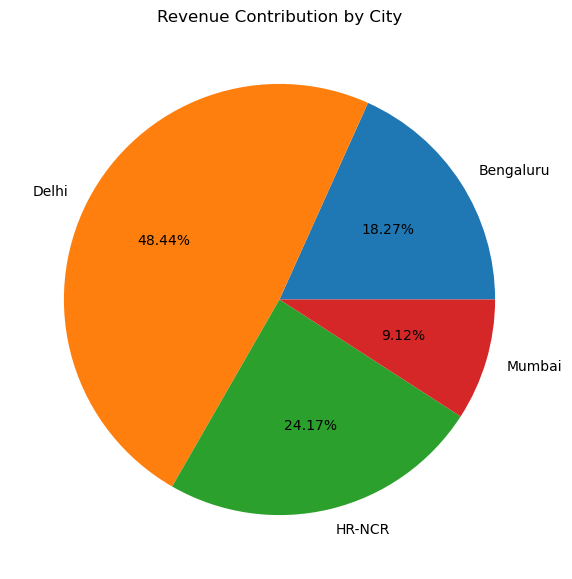

In [24]:
plt.figure(figsize=(10, 7))
plt.pie(city_revenue['Total_Revenue'], labels=city_revenue['City'], autopct='%1.2f%%')
plt.title('Revenue Contribution by City')
plt.show()

#### Observations

- Delhi contributes the highest percentage of total revenue at 48.44%.
- HR-NCR follows with 24.17% of the total revenue.
- Bengaluru contributes 18.27% of the total revenue.
- Mumbai has the smallest share, contributing 9.12% of the total revenue.

In summary, Delhi is the leading city in terms of revenue contribution, while Mumbai has the lowest share among the cities listed.

## 1.6. What is the average sale value per transaction?

In [25]:
# total revenue
total_revenue = df['revenue'].sum()

# total number of transactions (unique orders)
total_transactions = df['order_id'].nunique()

# 3. Average sale value per transaction
average_sale_value = total_revenue / total_transactions
average_sale_value = round(average_sale_value, 2)

print("Average Sale Value per Transaction: ", average_sale_value,'Rupees')

Average Sale Value per Transaction:  446.45 Rupees


---

# 2. Product Performance Analysis

## 2.1. Which products generate the highest revenue across all cities? What are the top 10 products by revenue?

In [26]:
# Group by product_id and product_name to calculate total revenue for each product
product_revenue = df.groupby(['product_id', 'product_name'])['revenue'].sum().reset_index()

# Sort by total revenue in descending order to get the top products
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Rename columns
top_10_products.columns = ['product_id', 'Product_Name', 'Total_Revenue']

# Display the top 10 products by revenue
print("Top 10 Products by Revenue:")
print(top_10_products)


Top 10 Products by Revenue:
      product_id                                      Product_Name  \
23            52          Fortune Soya Health Refined Soyabean Oil   
4046      333324  Aashirvaad Shudh Chakki Whole Wheat Atta (10 kg)   
805        15907      Fortune Premium Kachi Ghani Pure Mustard Oil   
1033       19512                       Amul Taaza Toned Fresh Milk   
5213      388639                               Chakki Atta (10 kg)   
5515      391306                                             Onion   
679        12872                   Amul Gold Full Cream Fresh Milk   
5034      383480                 Maggi Masala Noodles - Pack of 12   
72           160                                Amul Salted Butter   
4209      352443                                    Tender Coconut   

      Total_Revenue  
23         44626895  
4046       38480599  
805        35883651  
1033       31302981  
5213       30187384  
5515       27381541  
679        26557296  
5034       24312402  
72 

## 2.2. Are there any products that sell particularly well in specific cities?

In [27]:
# Group by city and product to calculate total revenue for each product in each city
city_product_revenue = df.groupby(['city_name', 'product_id', 'product_name'])['revenue'].sum().reset_index()

# Sort by city and total revenue to rank products within each city
city_product_revenue = city_product_revenue.sort_values(by=['city_name', 'revenue'], ascending=[True, False])

# Now, get the top 5 products for each city
top_5_products_per_city = city_product_revenue.groupby('city_name').head(5).reset_index(drop=True)

print(top_5_products_per_city)


    city_name  product_id                                       product_name  \
0   Bengaluru       37078                                  Nandini Pure Ghee   
1   Bengaluru      391305                                             Potato   
2   Bengaluru      391306                                              Onion   
3   Bengaluru      445675                                        Desi Tomato   
4   Bengaluru      309921  Nandini Shubham Pasteurised Standardized Fresh...   
5       Delhi          52           Fortune Soya Health Refined Soyabean Oil   
6       Delhi      333324   Aashirvaad Shudh Chakki Whole Wheat Atta (10 kg)   
7       Delhi      388639                                Chakki Atta (10 kg)   
8       Delhi       15907       Fortune Premium Kachi Ghani Pure Mustard Oil   
9       Delhi       82898                    Milkfood Rich Desi Danedar Ghee   
10     HR-NCR       19512                        Amul Taaza Toned Fresh Milk   
11     HR-NCR          52           Fort

## 2.3. How does the performance of top products vary month-to-month?

In [28]:
# Top products based on total revenue across all months
top_products = df.groupby('product_name')['revenue'].sum().nlargest(5).index.tolist()

# Filter the data for only the top products
top_products_data = df[df['product_name'].isin(top_products)]

# Group by product and month to calculate monthly revenue
top_products_data['month_year'] = top_products_data['date_'].dt.to_period('M')
monthly_performance = top_products_data.groupby(['product_name', 'month_year'])['revenue'].sum().reset_index()

print(monthly_performance)

                                        product_name month_year   revenue
0   Aashirvaad Shudh Chakki Whole Wheat Atta (10 kg)    2022-04  13255599
1   Aashirvaad Shudh Chakki Whole Wheat Atta (10 kg)    2022-05  12601934
2   Aashirvaad Shudh Chakki Whole Wheat Atta (10 kg)    2022-06   8604807
3   Aashirvaad Shudh Chakki Whole Wheat Atta (10 kg)    2022-07   4018259
4                                 Amul Salted Butter    2022-04  11157612
5                                 Amul Salted Butter    2022-05   8993296
6                                 Amul Salted Butter    2022-06   7713581
7                                 Amul Salted Butter    2022-07   6145416
8                        Amul Taaza Toned Fresh Milk    2022-04   9945796
9                        Amul Taaza Toned Fresh Milk    2022-05   7973718
10                       Amul Taaza Toned Fresh Milk    2022-06   8891253
11                       Amul Taaza Toned Fresh Milk    2022-07   4492214
12      Fortune Premium Kachi Ghani Pu

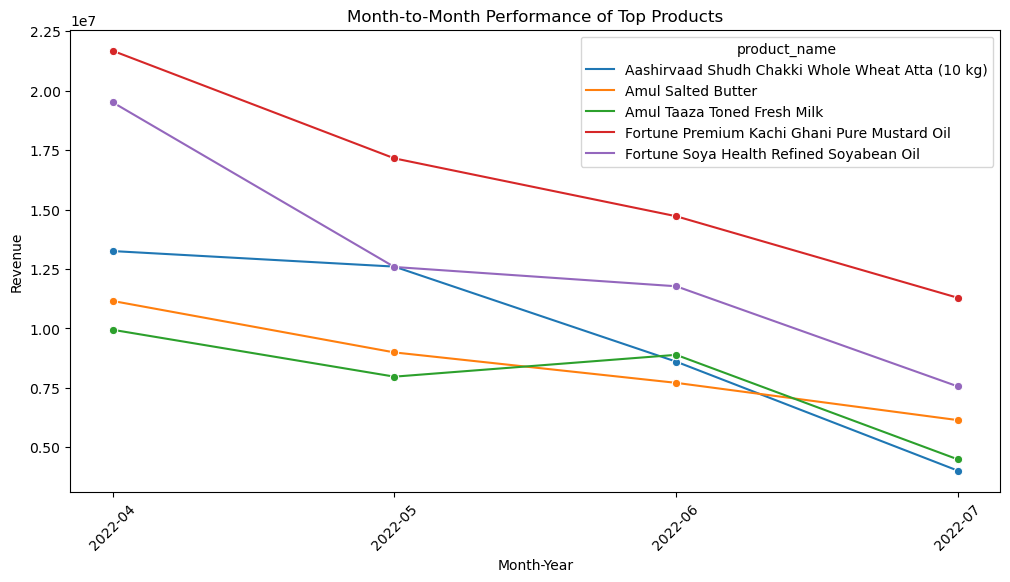

In [29]:
# Convert the 'month_year' (Period) to a string for plotting
monthly_performance['month_year'] = monthly_performance['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_performance, x='month_year', y='revenue', hue='product_name', marker='o')

plt.title('Month-to-Month Performance of Top Products')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.show()

---

# 3. Revenue from New vs. Repeat Customers 


## 3.1. What percentage of revenue is generated from repeat customers versus new customers? Is there a trend in customer loyalty over the months?


In [30]:
# Extract month and year for trend analysis
df['month_year'] = df['date_'].dt.to_period('M')

# Identify new vs repeat customers
df['customer_type'] = df.duplicated(subset=['dim_customer_key'], keep='first').map({True: 'Repeat', False: 'New'})

# Group by customer type and calculate total revenue 
revenue_split = df.groupby('customer_type')['revenue'].sum().reset_index()

# Percentage of revenue from new vs repeat customers
total_revenue = revenue_split['revenue'].sum()

revenue_split['percentage'] = (revenue_split['revenue'] / total_revenue) * 100
print(revenue_split)

  customer_type     revenue  percentage
0           New   260951065    5.624952
1        Repeat  4378218902   94.375048


customer_type        New      Repeat
month_year                          
2022-04        133847930  1385290407
2022-05         57511223  1126397509
2022-06         43956965  1173334909
2022-07         25634947   693196077


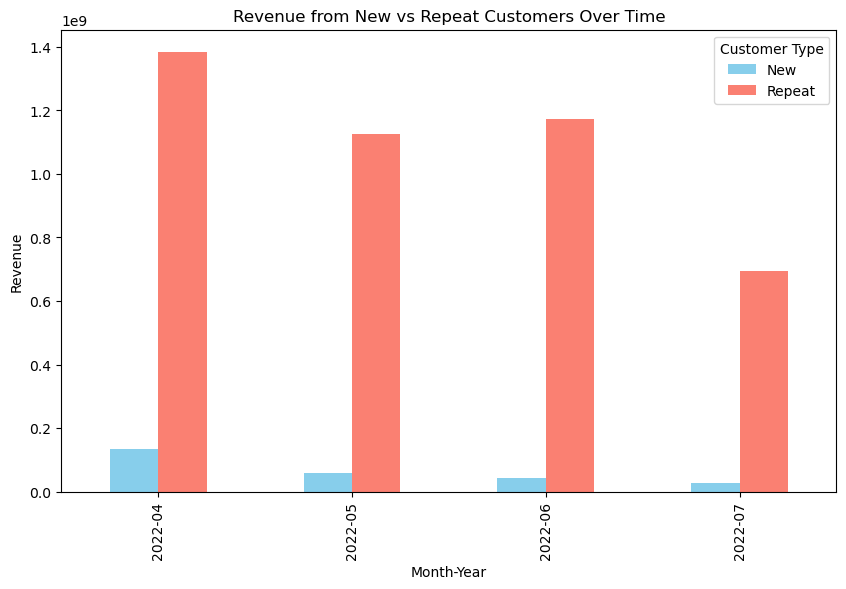

In [31]:
# Trend in customer loyalty over the months
monthly_revenue_split = df.groupby(['month_year', 'customer_type'])['revenue'].sum().reset_index()

# Pivot the data
monthly_revenue_pivot = monthly_revenue_split.pivot(index='month_year', columns='customer_type', values='revenue').fillna(0)
print(monthly_revenue_pivot)

# Plot trend of revenue from new vs repeat customers over time
monthly_revenue_pivot.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Revenue from New vs Repeat Customers Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.legend(title='Customer Type')
plt.show()

---
---
---

# Important Insights:

- **Flipkart generated ₹463.92 crore** in total revenue.


- **April 2022 was the most profitable month with ₹151.91 crore** in revenue.


- **Revenue steadily declined**, with **July 2022 being the lowest** at ₹71.88 crore.


- **1.039 crore orders** were placed in total.


- **Sunday recorded the highest sales at ₹80.95 crore**, followed by **Saturday with ₹79.34 crore**.


- **Weekend sales (Sunday and Saturday) were significantly higher than weekdays**, showing **strong consumer engagement during weekends**.


- **Tuesday** was the **lowest sales day**, generating only **₹53.83 crore**.


- **Delhi** contributed the **most to overall revenue (48.44%)**, while **Mumbai** had the **lowest contribution (9.12%)**.


- **The average sale value per transaction was ₹446.45**.


- **Fortune Soya Health Refined Soyabean Oil** was the **top revenue-generating product**, followed by **Aashirvaad Shudh Chakki Whole Wheat Atta**.


- **Amul** products were among the **top-selling items**, especially in **dairy-related categories** across **multiple cities**.


- **Delhi** and **HR-NCR** showed **strong sales** for **essential food products** like **oil and atta**, indicating regional preferences.


- **Customer loyalty** was **high**, with **94.38% of revenue** coming from **repeat customers**.


- **New customers** contributed only **5.62%**, indicating a **stable** and **loyal customer base**.